In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
X = df[['duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit']]

In [5]:
train_X = pd.read_csv('train_X.csv')
test_X = pd.read_csv('test_X.csv')

In [10]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('profit~' + '+'.join(predictor_subset),data = train_X).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [11]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [12]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 12 models on 1 predictors in 0.14620542526245117 seconds.
Processed 66 models on 2 predictors in 0.9350194931030273 seconds.
Processed 220 models on 3 predictors in 3.587369918823242 seconds.
Processed 495 models on 4 predictors in 8.305909872055054 seconds.
Processed 792 models on 5 predictors in 14.328640460968018 seconds.
Processed 924 models on 6 predictors in 19.528666973114014 seconds.
Processed 792 models on 7 predictors in 17.64806032180786 seconds.
Processed 495 models on 8 predictors in 12.055007934570312 seconds.
Processed 220 models on 9 predictors in 6.248569011688232 seconds.
Processed 66 models on 10 predictors in 2.198413133621216 seconds.
Processed 12 models on 11 predictors in 0.44922614097595215 seconds.
Processed 1 models on 12 predictors in 0.09295225143432617 seconds.
Total elapsed time: 87.71867847442627 seconds.


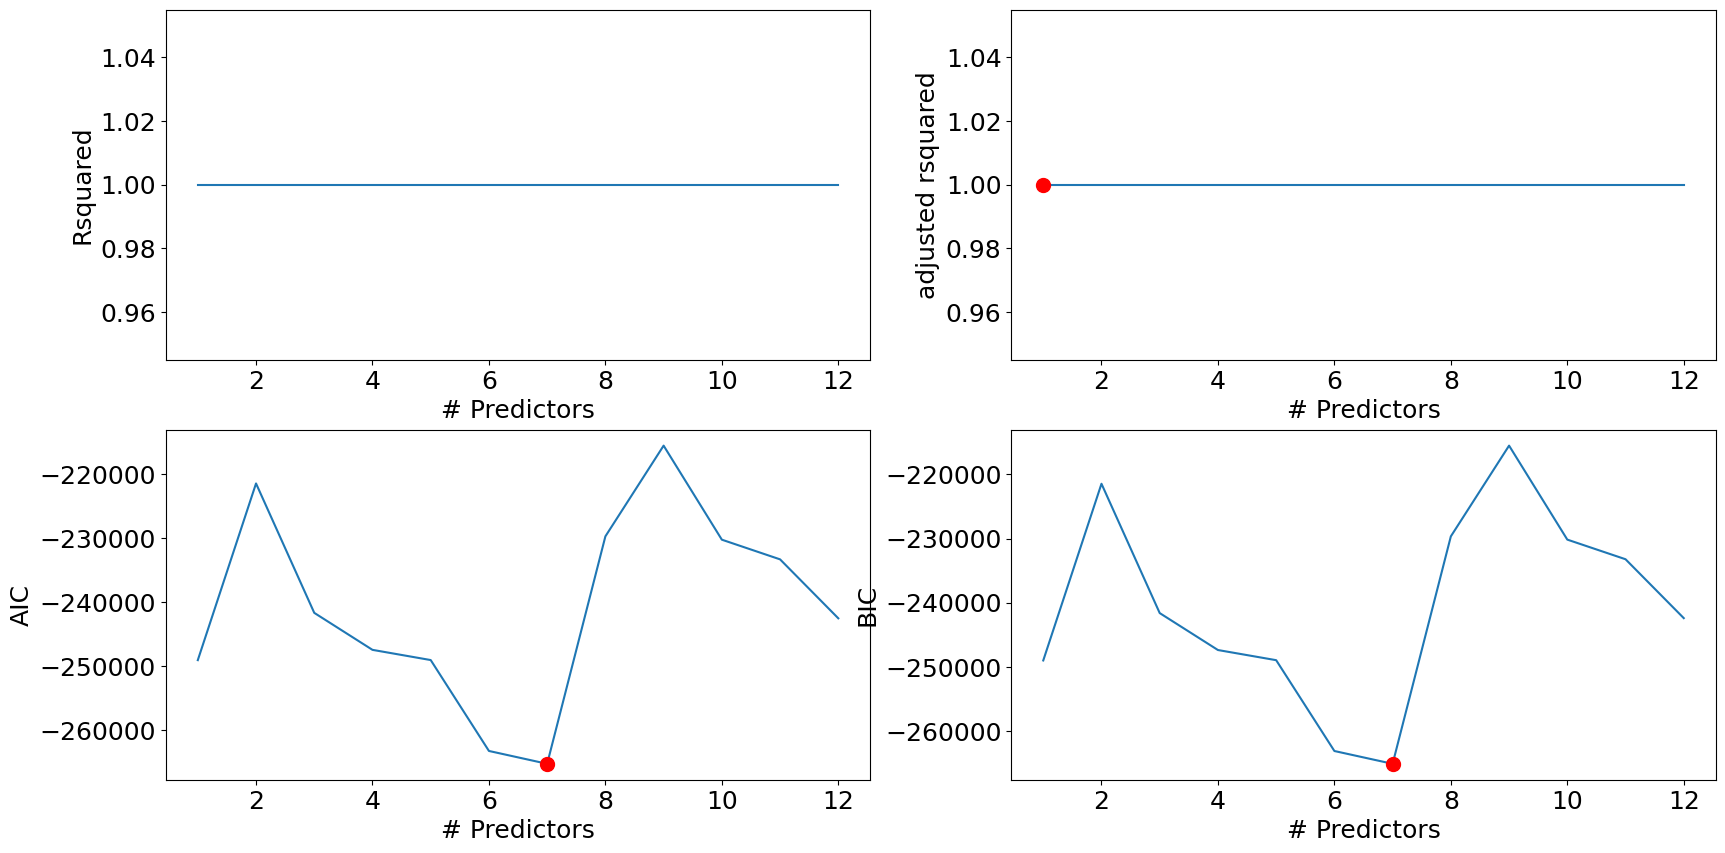

In [13]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [14]:
best_subset_model = models_best.loc[7,'model']
models_best.loc[7,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.052e+33
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:42:19   Log-Likelihood:             1.3261e+05
No. Observations:                8989   AIC:                        -2.652e+05
Df Residuals:                    8981   BIC:                        -2.651e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.492e-07   4.99e-09     69.945      0.000    3.39e-07    3.59e-07
duration                  -3.153e-09   4.49e-11    -70.275      0.000   -3.24e-09   -3.06e-09
director_facebook_likes   -5.882e-13   3.34e-13     -1.759      0.079   -1.24e-12    6.71e-14
actor_3_facebook_likes     5.108e-12   9.22e-13      5.538      0.000     3.3e-12    6.92e-12
actor_1_facebook_likes     2.042e-12   3.24e-13      6.296      0.000    1.41e-12    2.68e-12
cast_total_facebook_likes -3.558e-12   2.87e-13    -12.398      0.000   -4.12e-12      -3e-12
facenumber_in_poster       1.807e-10   5.26e-10      0.343      0.731   -8.51e-10    1.21e-09
profit                        1.0000   3.98e-18   2.51e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                     9106.307   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1618813.363
Skew:                           4.587   Prob(JB):                         0.00
Kurtosis:                      68.100   Cond. No.                     1.26e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Finding the RMSE of the model selected using the best subset selection procedure
pred_price = np.exp(best_subset_model.predict(test_X))
np.sqrt(((pred_price - test_X.profit)**2).mean())

c:\Users\Yasmeen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf